# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [11]:
#load the data set
dataset = 'C:/Users/Ryan Gunawan/Downloads/healthcare_dataset.csv'
df = pd.read_csv(dataset, sep=',')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [12]:
#Data Cleaning
df.duplicated().any()

False

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [14]:
df.isna().any()

Name                  False
Age                   False
Gender                False
Blood Type            False
Medical Condition     False
Date of Admission     False
Doctor                False
Hospital              False
Insurance Provider    False
Billing Amount        False
Room Number           False
Admission Type        False
Discharge Date        False
Medication            False
Test Results          False
dtype: bool

In [15]:
print((df==0).sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [16]:
#Transform
df = df.drop(['Name','Date of Admission', 'Discharge Date','Doctor','Hospital','Insurance Provider','Billing Amount','Room Number','Admission Type',], axis=1)
columns_to_encode = ['Gender', 'Blood Type', 'Medical Condition', 'Medication']
for column in columns_to_encode:
    df[column] = LabelEncoder().fit_transform(df[column])

df

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,81,0,7,3,0,Inconclusive
1,35,1,6,1,2,Normal
2,61,1,5,5,2,Normal
3,49,1,5,1,4,Abnormal
4,51,1,7,0,3,Normal
...,...,...,...,...,...,...
9995,83,1,0,5,1,Abnormal
9996,47,0,2,0,1,Normal
9997,54,1,5,0,1,Normal
9998,84,1,0,0,4,Normal


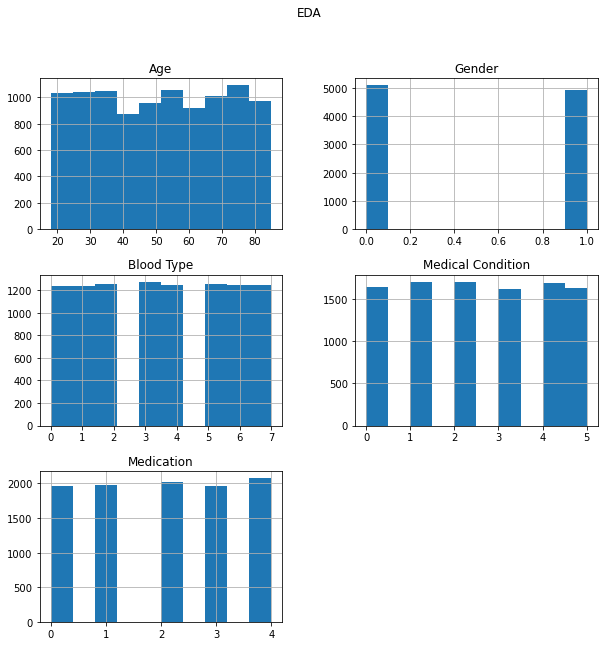

In [19]:
#Visualization
df.describe()
df.hist(figsize=(10,10))
plt.suptitle("EDA")
plt.show()

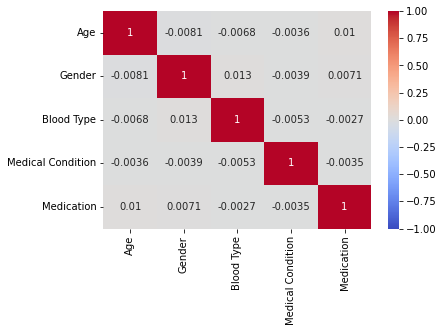

In [20]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [21]:
#using classification
X = df.drop("Test Results", axis=1)
y = df["Test Results"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
Log = LogisticRegression(random_state=42)
Log.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [24]:
ypred = Log.predict(X_test_scaled)
ypred

array(['Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Inconclusive', 'Inconclusive',
       'Normal', 'Normal', 'Inconclusive', 'Inconclusive', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Inconclusive',
       'Normal', 'Inconclusive', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Inconclusive', 'Abnormal', 'Abnormal', 'Inconclusive',
       'Abnormal', 'Abnormal', 'Inconclusive', 'Inconclusive', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Inconclusive',
       'Abnormal', 'Normal', 'Inconclusive', 'Abnormal', 'Inconclusive',
       'Abnormal', 'Inconclusive', 'Normal', 'Abnormal', 'Inconclusive',
       'Inconclusive', 'Abnormal', 'Normal', 'Inconclusive', 'Abnormal',
       'Abnormal', 'Inconclusive', 'Abnormal', 'Normal', 'Inconclusive',
       'Abnormal', 'Inconclusive', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Inconclusive', 'Abnormal', 'Abnormal', 'Inconclusive',


In [31]:
Matrix = confusion_matrix(y_test,ypred)
print("Confusion Matrix \n", Matrix)

accuracy = accuracy_score(y_test,ypred)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[222  86  52]
 [199  70  44]
 [209  79  39]]
Accuracy Score:  0.331


In [32]:
#comparing using KNN
KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [34]:
ypredKNN = KNN.predict(X_test_scaled)
ypredKNN

array(['Inconclusive', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Inconclusive', 'Inconclusive', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Inconclusive', 'Inconclusive', 'Normal', 'Abnormal',
       'Inconclusive', 'Abnormal', 'Inconclusive', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Inconclusive', 'Abnormal', 'Inconclusive', 'Abnormal',
       'Inconclusive', 'Abnormal', 'Abnormal', 'Inconclusive', 'Abnormal',
       'Abnormal', 'Abnormal', 'Inconclusive', 'Abnormal', 'Inconclusive',
       'Abnormal', 'Normal', 'Abnormal', 'Inconclusive', 'Inconclusive',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Normal', 'Normal', 'Inconclusive', 'Inconclusive', 'Abnormal',
       'Inconclusive', 'Normal', 'Abnormal', 'Abnormal', 'Inconclusive',
       'Abnormal', 'Inconclusive', 'Abnormal', 'Inconclusive', 'Normal',
       'Abnormal',

In [35]:
Matrix = confusion_matrix(y_test,ypredKNN)
print("Confusion Matrix \n", Matrix)

accuracy = accuracy_score(y_test,ypredKNN)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[202  89  69]
 [157 101  55]
 [146 110  71]]
Accuracy Score:  0.374
